Nama     : Angelica Widyastuti Kolo
NIM      : A11.2021.13212
Kelompok : A11.4412

# Pemanfaatan Algoritma SVM dalam Prediksi Penyakit Diabetes dengan Metode Supervised Learning

## Ringkasan Masalah

## Tujuan Yang Akan Dicapai

## Model/Alur Penyelesaian

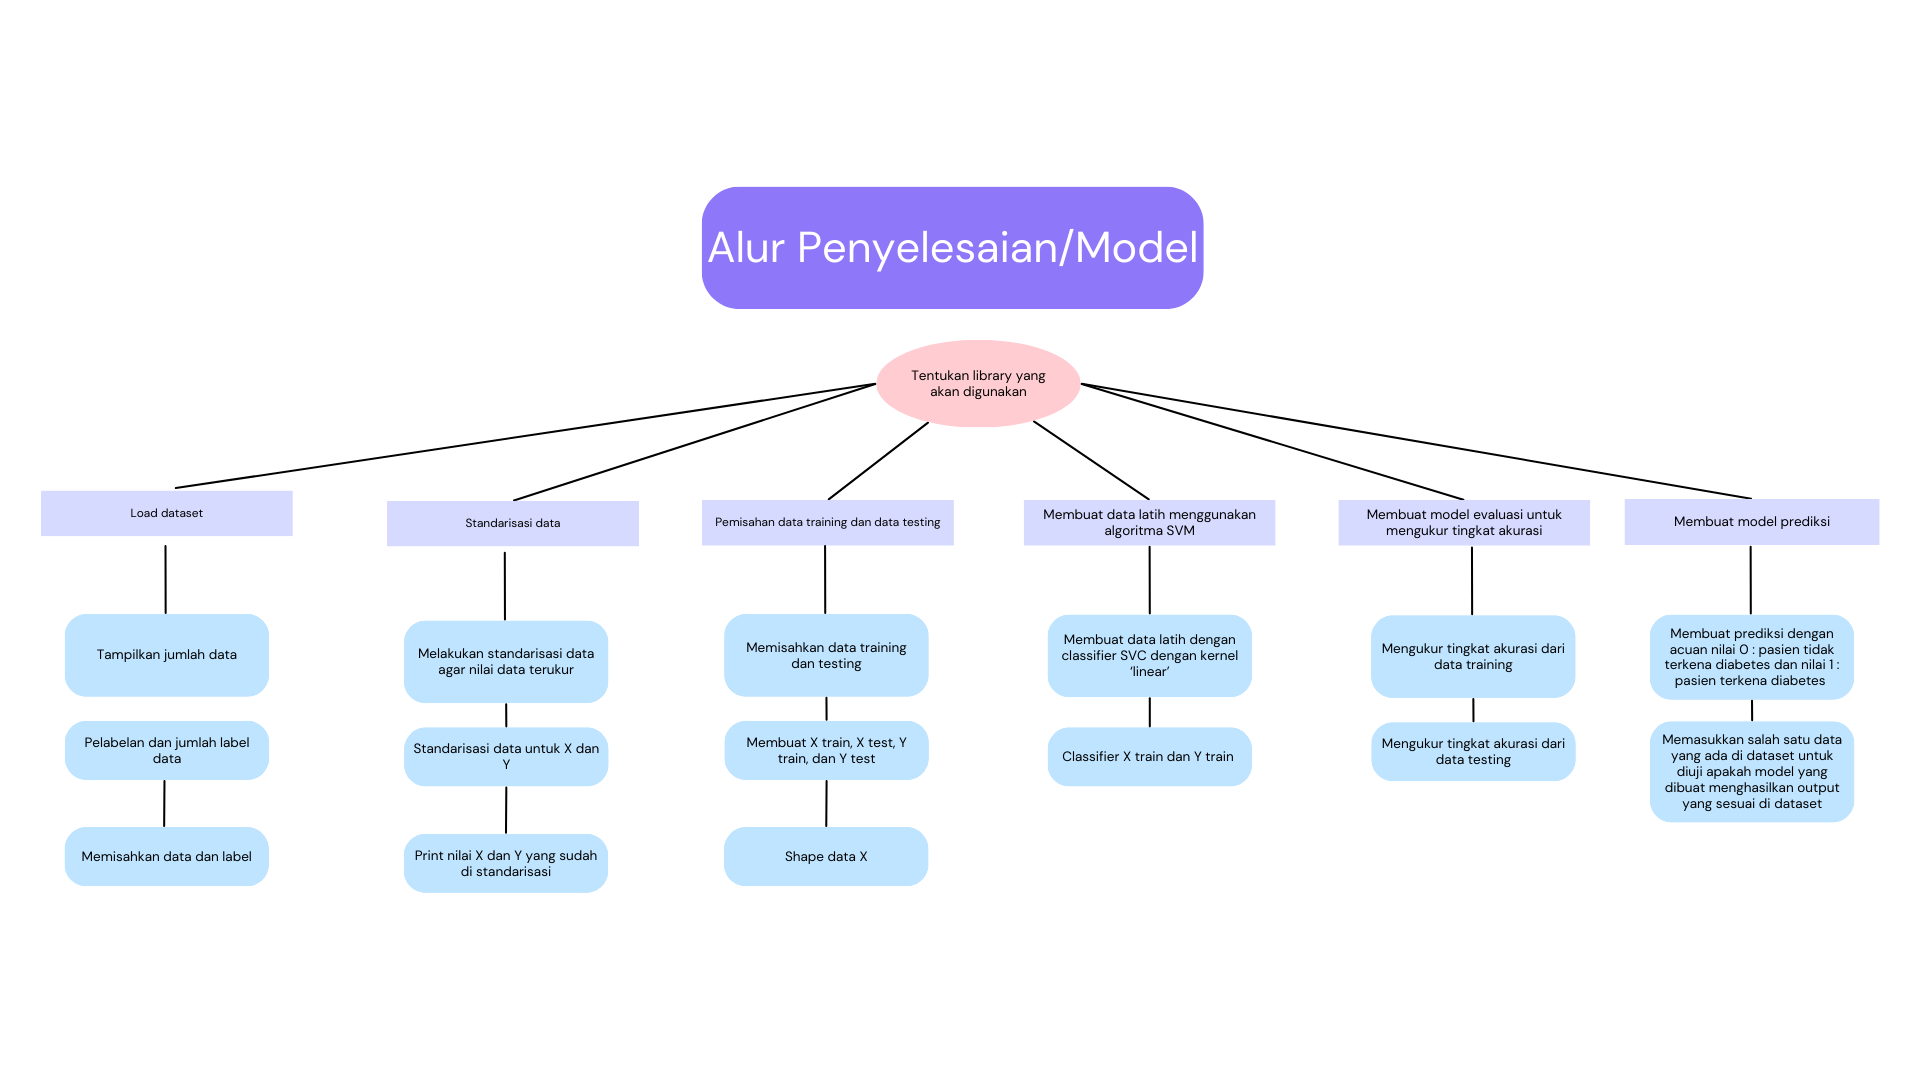

## Penjelasan Dataset

## EDA 

## Proses Features Dataset

## Proses Learning / Modeling

In [6]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
#load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#jumlah data
diabetes_dataset.shape

(768, 9)

In [9]:
#label meaning : 1 (terkena diabetes) 0 (tidak terkena diabetes)
#menjumlahkan label (Outcome)
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
print(diabetes_dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

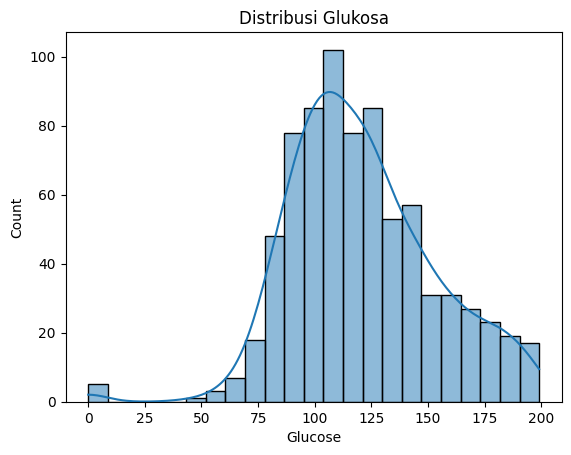

In [11]:
# Visualisasi Distribusi Data
sns.histplot(diabetes_dataset['Glucose'], kde=True)
plt.title('Distribusi Glukosa')
plt.show()

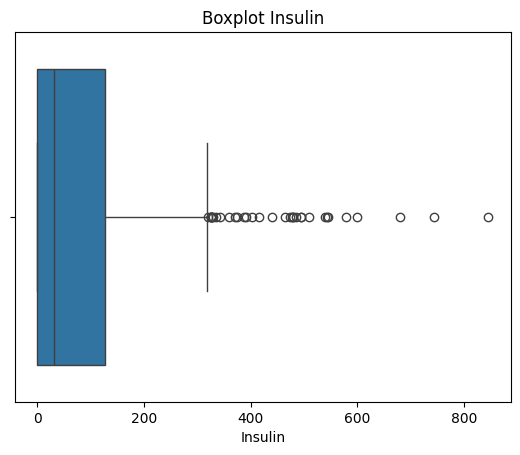

In [12]:
sns.boxplot(x=diabetes_dataset['Insulin'])
plt.title('Boxplot Insulin')
plt.show()

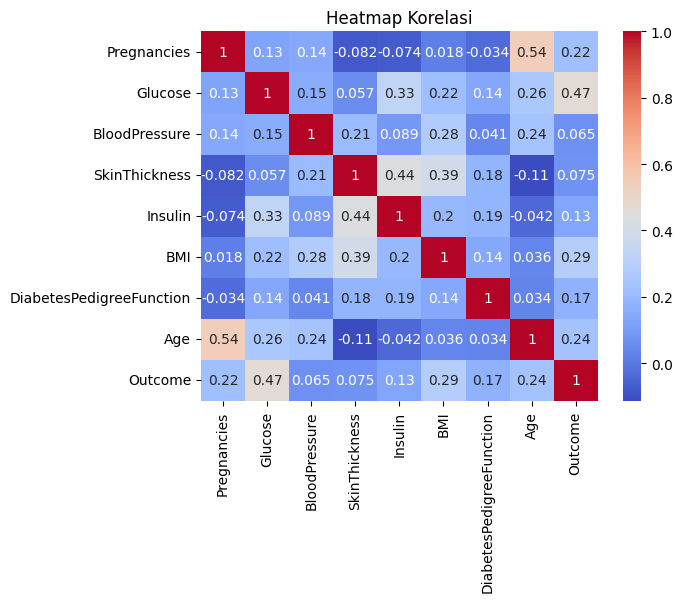

In [13]:
# Korelasi Antar Fitur
corr = diabetes_dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [14]:
# Pemeriksaan Missing Values
print(diabetes_dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
#memisahkan data dan label
X = diabetes_dataset.drop (columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
#standarisasi data
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standarized_data = scaler.transform(X)

In [21]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standarized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
#memisahkan data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [26]:
#membuat data latih menggunakan algoritma SVM
classifier = svm.SVC(kernel='linear')

In [27]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Performa Model

In [28]:
#membuat model evaluasi untuk mengukur tingkat akurasi
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Akurasi Data Training adalah = ', training_data_accuracy)

Akurasi Data Training adalah =  0.7866449511400652


In [30]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Akurasi Data Testing adalah = ', test_data_accuracy)

Akurasi Data Testing adalah =  0.7727272727272727


In [32]:
#membuat model prediksi
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
Pasien terkena diabetes


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Diskusi Hasil 

## Kesimpulan